# Laptop Price Prediction

#### Loading the Data-Set for the Project

In [89]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [90]:
data = pd.read_csv("Datasets/laptop_price_prediction/laptops.csv", encoding='latin-1')
data.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


# Data Cleaning Process
<ol>

<li> Remove extra unnecessary details form Product Columns
 <li> Extract CPU Vender, CPU Type and CPU Speed in Different Columns
 <li> Convert Ram into Numeric Values
 <li> Extract Memory type from Memory Column
 <li> Convert Weight into numeric Values
 <li> Extract GPU Vender, GPU Type in Different Columns
 <li> Extract IPS and Touchscreen Feature form ScreenResolution Column
 </ol>

## Remove extra unnecessary details form Product Columns

In [92]:
data["Product"] = data["Product"].str.split("(").apply(lambda x: x[0])

 ## Extract CPU Vender, CPU Type and CPU Speed in Different Columns

In [93]:
data["Cpu_Speed"] = data["Cpu"].str.split(" ").apply(lambda x: x[-1]).str.replace("GHz", "")
data["Cpu_Vender"] = data["Cpu"].str.split(" ").apply(lambda x: x[0])
data["Cpu_Type"] = data["Cpu"].str.split(" ").apply(lambda x: x[1:4] if x[1] == "Celeron" and "Pentium" and "Xeon" else (x[1:3] if (x[1] == "Core" or x[0] == "AMD") else x[0]) )
data["Cpu_Type"] = data["Cpu_Type"].apply(lambda x: ' '.join(x))
data["Cpu_Type"]
data

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3,Intel,Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8,Intel,Core i5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5,Intel,Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7,Intel,Core i7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1,Intel,Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,2.5,Intel,Core i7
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,2.5,Intel,Core i7
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,1.6,Intel,Celeron Dual Core
1301,1319,HP,15-AC110nv,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,2.5,Intel,Core i7


## Extract Memory type from Memory Column

In [94]:
split_mem = data['Memory'].str.split(' ', 1, expand=True)
data['Storage Type'] = split_mem[1]
data['Memory'] = split_mem[0]
data["Memory"].unique()
data

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type,Storage Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3,Intel,Core i5,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8,Intel,Core i5,Flash Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5,Intel,Core i5,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7,Intel,Core i7,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1,Intel,Core i5,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB,Intel HD Graphics 520,Windows 10,1.8kg,638.00,2.5,Intel,Core i7,SSD
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,2.5,Intel,Core i7,SSD
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB,Intel HD Graphics,Windows 10,1.5kg,229.00,1.6,Intel,Celeron Dual Core,Flash Storage
1301,1319,HP,15-AC110nv,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,2.5,Intel,Core i7,HDD


In [95]:
data["Ram"] = data["Ram"].str.replace("GB", "")

df_mem= data['Memory'].str.split('(\d+)',  expand=True)
data['Memory'] = pd.to_numeric(df_mem[1])
data.rename(columns={'Memory':'Memory (GB or TB)'}, inplace=True)

def mem(x):
    if x == 1:
        return 1024
    elif x == 2:
        return 2048
data['Memory (GB or TB)'] = data['Memory (GB or TB)'].apply(lambda x: 1024 if x==1 else x)
data['Memory (GB or TB)'] = data['Memory (GB or TB)'].apply(lambda x: 2048 if x==2 else x)
data.rename(columns={'Memory (GB or TB)':'Storage (GB)'}, inplace=True)
data

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Storage (GB),Gpu,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type,Storage Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3,Intel,Core i5,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8,Intel,Core i5,Flash Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5,Intel,Core i5,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7,Intel,Core i7,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1,Intel,Core i5,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128,Intel HD Graphics 520,Windows 10,1.8kg,638.00,2.5,Intel,Core i7,SSD
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,2.5,Intel,Core i7,SSD
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64,Intel HD Graphics,Windows 10,1.5kg,229.00,1.6,Intel,Celeron Dual Core,Flash Storage
1301,1319,HP,15-AC110nv,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1024,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,2.5,Intel,Core i7,HDD


## Convert Weight into numeric Values

In [96]:
data["Weight"] = data["Weight"].str.replace("kg", "")
data

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Storage (GB),Gpu,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type,Storage Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,Intel,Core i5,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,Intel,Core i5,Flash Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,2.5,Intel,Core i5,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,Intel,Core i7,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,Intel,Core i5,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128,Intel HD Graphics 520,Windows 10,1.8,638.00,2.5,Intel,Core i7,SSD
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512,Intel HD Graphics 520,Windows 10,1.3,1499.00,2.5,Intel,Core i7,SSD
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64,Intel HD Graphics,Windows 10,1.5,229.00,1.6,Intel,Celeron Dual Core,Flash Storage
1301,1319,HP,15-AC110nv,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1024,AMD Radeon R5 M330,Windows 10,2.19,764.00,2.5,Intel,Core i7,HDD


## Extract GPU Vender, GPU Type in Different Columns

In [97]:
gpu_distribution_list = data["Gpu"].str.split(" ")
#data["Gpu_Vender"] = data["Gpu"].str.split(" ").apply(lambda x: x[0:2]  if x[0] == "Intel" else x[0]  if x[0] == "Intel Iris" else x[0])
data["Gpu_Vender"] = data["Gpu"].str.split(" ").apply(lambda x: x[0])
data["Gpu_Type"] = data["Gpu"].str.split(" ").apply(lambda x: x[1:])
data["Gpu_Type"] = data["Gpu_Type"].apply(lambda x: ' '.join(x))
data

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Storage (GB),Gpu,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type,Storage Type,Gpu_Vender,Gpu_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,Intel,Core i5,SSD,Intel,Iris Plus Graphics 640
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,Intel,Core i5,Flash Storage,Intel,HD Graphics 6000
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,2.5,Intel,Core i5,SSD,Intel,HD Graphics 620
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,Intel,Core i7,SSD,AMD,Radeon Pro 455
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,Intel,Core i5,SSD,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128,Intel HD Graphics 520,Windows 10,1.8,638.00,2.5,Intel,Core i7,SSD,Intel,HD Graphics 520
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512,Intel HD Graphics 520,Windows 10,1.3,1499.00,2.5,Intel,Core i7,SSD,Intel,HD Graphics 520
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64,Intel HD Graphics,Windows 10,1.5,229.00,1.6,Intel,Celeron Dual Core,Flash Storage,Intel,HD Graphics
1301,1319,HP,15-AC110nv,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1024,AMD Radeon R5 M330,Windows 10,2.19,764.00,2.5,Intel,Core i7,HDD,AMD,Radeon R5 M330


 ## Extract IPS and Touchscreen Feature form ScreenResolution Column

In [98]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)


 ## Catorizing The Operating System

In [99]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

data['OpSys'] = data['OpSys'].apply(cat_os)

 ## Fetching Out The Use Full Columns the Leaving The Rest

In [100]:
data = data.reindex(columns=["Company", "TypeName", "Inches", "Touchscreen", "Ips", "Cpu_Vender", "Cpu_Type","Ram", "Storage (GB)", "Storage Type", "Gpu_Vender", "Gpu_Type", "Weight", "OpSys", "Price_euros" ])

In [101]:
data

,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vender,Cpu_Type,Ram,Storage (GB),Storage Type,Gpu_Vender,Gpu_Type,Weight,OpSys,Price_euros
0,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,128,SSD,Intel,Iris Plus Graphics 640,1.37,Mac,1339.69
1,Apple,Ultrabook,13.3,0,0,Intel,Core i5,8,128,Flash Storage,Intel,HD Graphics 6000,1.34,Mac,898.94
2,HP,Notebook,15.6,0,0,Intel,Core i5,8,256,SSD,Intel,HD Graphics 620,1.86,Others/No OS/Linux,575.00
3,Apple,Ultrabook,15.4,0,1,Intel,Core i7,16,512,SSD,AMD,Radeon Pro 455,1.83,Mac,2537.45
4,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,256,SSD,Intel,Iris Plus Graphics 650,1.37,Mac,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1,1,Intel,Core i7,4,128,SSD,Intel,HD Graphics 520,1.8,Windows,638.00
1299,Lenovo,2 in 1 Convertible,13.3,1,1,Intel,Core i7,16,512,SSD,Intel,HD Graphics 520,1.3,Windows,1499.00
1300,Lenovo,Notebook,14.0,0,0,Intel,Celeron Dual Core,2,64,Flash Storage,Intel,HD Graphics,1.5,Windows,229.00
1301,HP,Notebook,15.6,0,0,Intel,Core i7,6,1024,HDD,AMD,Radeon R5 M330,2.19,Windows,764.00


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Inches        1303 non-null   float64
 3   Touchscreen   1303 non-null   int64  
 4   Ips           1303 non-null   int64  
 5   Cpu_Vender    1303 non-null   object 
 6   Cpu_Type      1303 non-null   object 
 7   Ram           1303 non-null   object 
 8   Storage (GB)  1303 non-null   int64  
 9   Storage Type  1303 non-null   object 
 10  Gpu_Vender    1303 non-null   object 
 11  Gpu_Type      1303 non-null   object 
 12  Weight        1303 non-null   object 
 13  OpSys         1303 non-null   object 
 14  Price_euros   1303 non-null   float64
dtypes: float64(2), int64(3), object(10)
memory usage: 152.8+ KB


### Transforming the Data Type of some of the Columns
<ol>
<li> Ram
<li> Storage
<li> Weight
</ol>

In [103]:
data["Ram"] = data["Ram"].astype("int")
data["Storage (GB)"] = data["Storage (GB)"].astype("int")
data["Weight"] = data["Weight"].astype("float")

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Inches        1303 non-null   float64
 3   Touchscreen   1303 non-null   int64  
 4   Ips           1303 non-null   int64  
 5   Cpu_Vender    1303 non-null   object 
 6   Cpu_Type      1303 non-null   object 
 7   Ram           1303 non-null   int32  
 8   Storage (GB)  1303 non-null   int32  
 9   Storage Type  1303 non-null   object 
 10  Gpu_Vender    1303 non-null   object 
 11  Gpu_Type      1303 non-null   object 
 12  Weight        1303 non-null   float64
 13  OpSys         1303 non-null   object 
 14  Price_euros   1303 non-null   float64
dtypes: float64(3), int32(2), int64(2), object(8)
memory usage: 142.6+ KB


In [105]:
backup = data.to_csv("Backup_datasets/laptop_price(3rd).csv")

 ## Analysing Relation with The Clean Data

In [106]:
sns.set(rc={"figure.figsize":(9, 5)})

<AxesSubplot:>

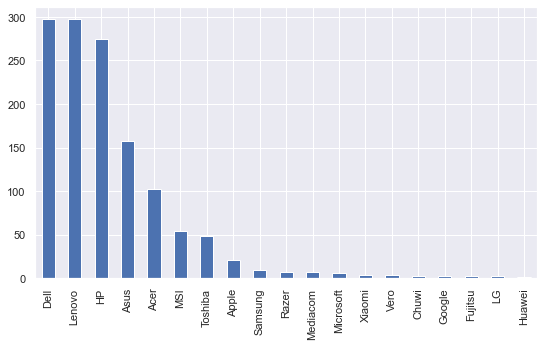

In [107]:
data["Company"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Company', ylabel='Price_euros'>

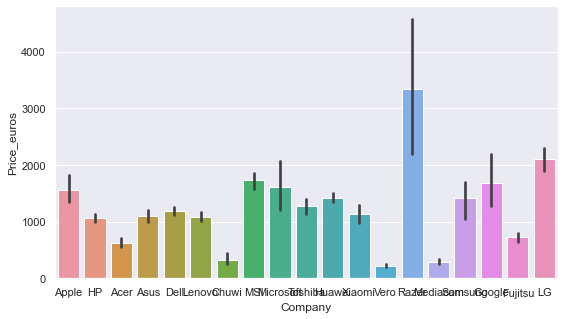

In [108]:
sns.barplot(x=data["Company"], y=data["Price_euros"])

<AxesSubplot:>

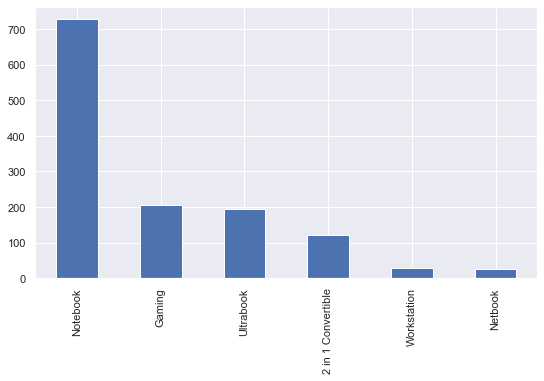

In [ ]:
data["TypeName"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

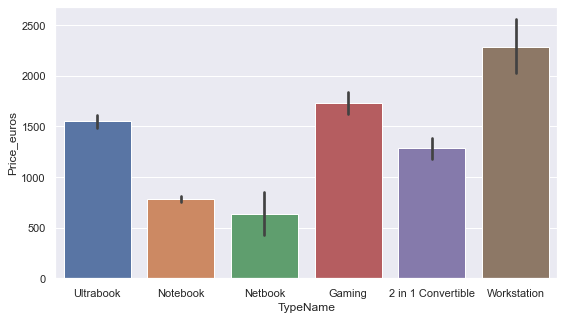

In [109]:
sns.barplot(x=data['TypeName'],y=data['Price_euros'])

In [110]:
cpu_distribution = data["Cpu_Type"].value_counts()[:10].reset_index()
cpu_distribution

,index,Cpu_Type
0,Core i7,527
1,Core i5,423
2,Core i3,136
3,Celeron Dual Core,80
4,I n t e l,47
5,Core M,19
6,A9-Series 9420,12
7,Celeron Quad Core,8
8,A6-Series 9220,8
9,A12-Series 9720P,7


<AxesSubplot:xlabel='index', ylabel='Cpu_Type'>

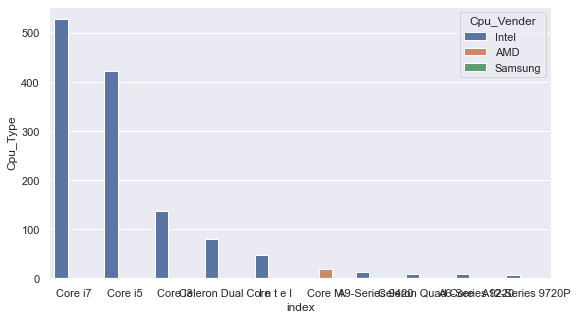

In [111]:
sns.barplot(x=cpu_distribution["index"], y=cpu_distribution["Cpu_Type"], hue="Cpu_Vender", data=data)

In [112]:
gpu_distribution = data["Gpu_Type"].value_counts()[:10].reset_index()
gpu_distribution

,index,Gpu_Type
0,HD Graphics 620,281
1,HD Graphics 520,185
2,UHD Graphics 620,68
3,GeForce GTX 1050,66
4,GeForce GTX 1060,48
5,GeForce 940MX,43
6,Radeon 530,41
7,HD Graphics 500,39
8,HD Graphics 400,37
9,GeForce GTX 1070,30


<AxesSubplot:xlabel='index', ylabel='Gpu_Type'>

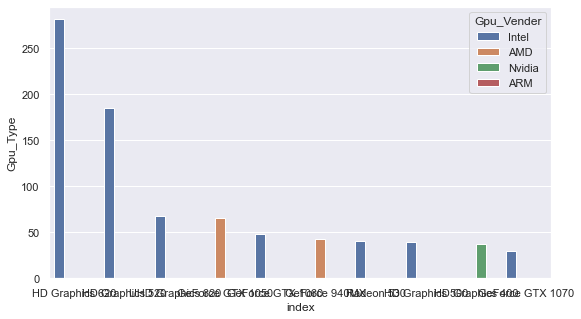

In [113]:
sns.barplot(x=gpu_distribution["index"], y=gpu_distribution["Gpu_Type"], hue="Gpu_Vender", data=data)

<AxesSubplot:xlabel='OpSys', ylabel='Price_euros'>

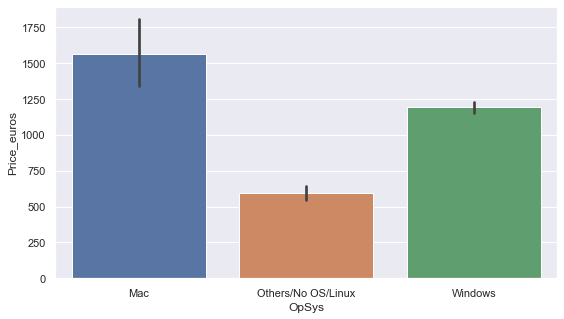

In [114]:
sns.barplot(x=data['OpSys'],y=data['Price_euros'])

In [115]:
corr_data = data.corr()
corr_data["Price_euros"].sort_values(ascending=False)

Price_euros     1.000000
Ram             0.743007
Ips             0.252208
Weight          0.210370
Touchscreen     0.191226
Inches          0.068197
Storage (GB)   -0.125363
Name: Price_euros, dtype: float64

<AxesSubplot:>

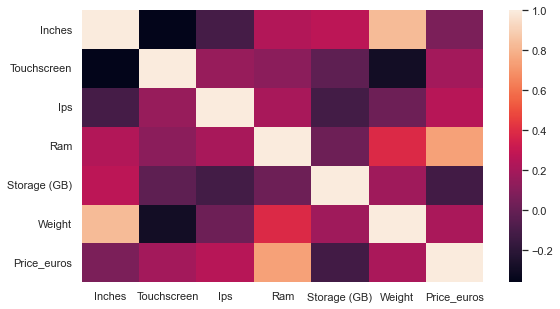

In [ ]:
sns.heatmap(data.corr())

## Result of Analysing Data
 <ol>
 <li> Dell, Lenovo and HP are dominant company in Selling Laptops
 <li> The Average Price of the Laptop in all Branda lies between 1500 to 200 Euros
 <li> In The Laptop Type NoteBook is a Dominant Factor as its Price is also preety low compare to its popularity and other Laptop Type
 <li> In CPU and GPU section Intel is the Dominant Member where in Cpu Intel Core i7 and in Gpu Intel HD Graphics is most Popular 
 <li> In Operating System Mac is the clear Winner but Windows is also not much Far away
 <li> According to the Analysis the Atribute which makes the most price Difference of the laptops are Ram, IPS Display, Weight and Touchscreen

In [116]:
X = data.drop(columns=['Price_euros'])
y = np.log(data['Price_euros'])

## Using Machine Learning to Predict Laptop Price
 
 ### I have tested this data with many well-Know Algorithims and i got the best result from VotingRegression Algorithm you can also any other Algorithm too.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [117]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor

In [118]:

from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'),[0,1,5,6,9,10,11,13])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8994964702753886
MAE 0.15083004697305405


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


 ## Exporting the Algorithm 


In [ ]:
import pickle
pickle.dump(pipe,open('models/laptop_price(3rd).pkl','wb'))